In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

S:\Users\sifat\anaconda3\envs\tf-gpu\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
S:\Users\sifat\anaconda3\envs\tf-gpu\lib\site-packages\numpy\.libs\libopenblas.NOIJJG62EMASZI6NYURL6JBKM4EVBGM7.gfortran-win_amd64.dll
S:\Users\sifat\anaconda3\envs\tf-gpu\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
  stacklevel=1)


In [2]:
nadia = cv2.imread('test images/nadia.jpg',0)
denis = cv2.imread('test images/denis.jpg',0)
solvay = cv2.imread('test images/solvay.jpg',0)

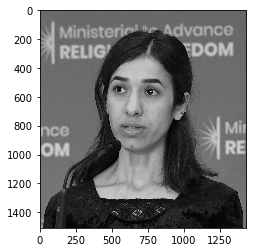

In [3]:
plt.imshow(nadia,'gray')

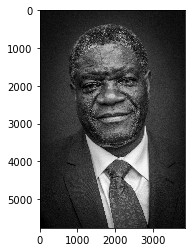

In [4]:
plt.imshow(denis,'gray')

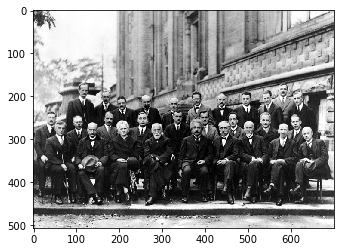

In [5]:
plt.imshow(solvay,'gray')

In [6]:
face_cascade = cv2.CascadeClassifier('data/haarcascades_cuda//haarcascade_frontalface_default.xml')

In [7]:
def detect_face(img):
    
    face_img = img.copy()
    face_rect = face_cascade.detectMultiScale(face_img)
    
    for (x,y,w,h) in face_rect:
        cv2.rectangle(face_img,(x,y),(x+w,y+h),(255,255,255),10)
        
    return face_img

In [8]:
result = detect_face(solvay)

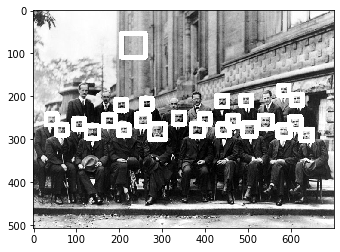

In [9]:
plt.imshow(result,cmap='gray')

In [10]:
## with a scale factor and minimum Neighbors
def adj_detect_face(img):
    
    face_img = img.copy()
    face_rect = face_cascade.detectMultiScale(face_img,scaleFactor=1.4,minNeighbors=1)
    
    for (x,y,w,h) in face_rect:
        cv2.rectangle(face_img,(x,y),(x+w,y+h),(255,255,255),10)
        
    return face_img

In [11]:
result = adj_detect_face(solvay)

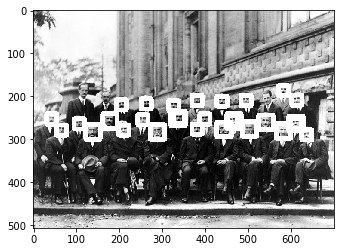

In [12]:
plt.imshow(result,'gray')

In [13]:
eye_cascade = cv2.CascadeClassifier('data/haarcascades_cuda/haarcascade_eye.xml')

In [14]:
## with a scale factor and minimum Neighbors
def adj_detect_eye(img):
    
    eye_img = img.copy()
    eye_rect = eye_cascade.detectMultiScale(eye_img,scaleFactor=1.3,minNeighbors=5)
    
    for (x,y,w,h) in eye_rect:
        cv2.rectangle(eye_img,(x,y),(x+w,y+h),(255,255,255),10)
        
    return eye_img

In [15]:
result = adj_detect_eye(nadia)

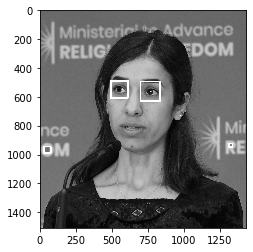

In [16]:
plt.imshow(result,'gray')

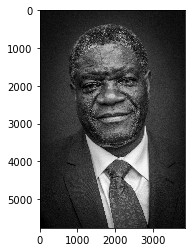

In [17]:
result = adj_detect_eye(denis)
plt.imshow(result,'gray')

In [21]:
cap = cv2.VideoCapture(0)

while True:
    ret,frame = cap.read(0)
    
    frame = adj_detect_face(frame)
#     resized =cv2.resize(frame,(150,150))
#     print(resized.shape)
    cv2.imshow('Video Face Detector',frame)
    
    k = cv2.waitKey(1)
    
    if k == 27:
        break
        
cap.release()
cv2.destroyAllWindows()